In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
def manhattan(chrom_num, pop):
    # Read the GWAS summary statistics file

    file_path = f'../data/assoc/{chrom_num}.{pop}.assoc.dat'

    df = pd.read_csv(file_path, sep="\t")

    df = df.drop(columns=['PANEL', 'FILE'])

    df = df.set_index('ID')

    # Select relevant columns
    df = df[['CHR', 'P0', 'TWAS.P']].dropna()  # Drop missing values

    # Strip whitespace and convert to numeric, forcing errors to NaN
    df['TWAS.P'] = pd.to_numeric(df['TWAS.P'].str.strip(), errors='coerce')

    # Drop NaN values
    df = df.dropna()

    # Convert P-values to -log10(P) for plotting
    # df['-log10(P)'] = -np.log10(df['TWAS.P'])
    df['TWAS.P'] = df['TWAS.P'].astype(float)
    df['-log10(P)'] = df['TWAS.P'].apply(lambda x: -np.log10(x))    

    # Convert chromosome numbers to integers for sorting
    df['CHR'] = df['CHR'].astype(int)

    # Sort by chromosome and position
    df = df.sort_values(by=['CHR'])


    # Generate a Manhattan plot

    # Set up the plot
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red']  # Alternating colors for chromosomes

    # Plot each chromosome separately
    for i, chrom in enumerate(df['CHR'].unique()):
        chr_data = df[df['CHR'] == chrom]
        plt.scatter(chr_data['P0'], chr_data['-log10(P)'], 
                    color=colors[i % 2], label=f'Chromosome {chrom}', s=5)

    # Add significance threshold line (suggested genome-wide threshold: 5e-8)
    plt.axhline(y=-np.log10(5e-8), color='black', linestyle='dashed', linewidth=1)

    # Labels and title
    plt.xlabel("x")
    plt.ylabel("-log10(P-value)")
    plt.title(f"Manhattan Plot of GWAS Data (Population: {pop}, Chromosome: {chrom_num})")
    plt.legend(loc="upper right", markerscale=3, fontsize=8)

    # Show the plot
    plt.show()

    # os.makedirs(f'../plots/manhattan/{pop}', exist_ok=True)
    # plt.savefig(f'../plots/manhattan/{pop}/chr{chrom_num}.png')





In [3]:
def data_prep(chrom_num, pop):
    # Read the GWAS summary statistics file

    file_path = f'../data/assoc/{chrom_num}.{pop}.assoc.dat'

    df = pd.read_csv(file_path, sep="\t")

    df = df.drop(columns=['PANEL', 'FILE'])

    df = df.set_index('ID')

    # Select relevant columns
    df = df[['CHR', 'P0', 'TWAS.P']].dropna()  # Drop missing values

    # Strip whitespace and convert to numeric, forcing errors to NaN
    df['TWAS.P'] = pd.to_numeric(df['TWAS.P'].str.strip(), errors='coerce')

    # Drop NaN values
    df = df.dropna()

    # Convert P-values to -log10(P) for plotting
    # df['-log10(P)'] = -np.log10(df['TWAS.P'])
    df['TWAS.P'] = df['TWAS.P'].astype(float)
    df['-log10(P)'] = df['TWAS.P'].apply(lambda x: -np.log10(x))    

    # Convert chromosome numbers to integers for sorting
    df['CHR'] = df['CHR'].astype(int)

    # Sort by chromosome and position
    df = df.sort_values(by=['CHR'])

    return df

In [4]:
def miami(chrom_num, pop):

    df1 = data_prep(chrom_num, pop)
    df2 = data_prep(chrom_num, 'eur')

    print(f"Data for {pop}:")
    print(df1.describe())
    print(f"Data for eur:")
    print(df2.describe())

    # Set up the plot
    plt.figure(figsize=(12, 6))
    colors = ['blue', 'red']  # Alternating colors for chromosomes

    # Plot each chromosome separately
    for i, chrom in enumerate(df1['CHR'].unique()):
        chr_data = df1[df1['CHR'] == chrom]
        plt.scatter(chr_data['P0'], chr_data['-log10(P)'], 
                    color=colors[i % 2], label=f'{pop}', s=5)
        
    # Plot each chromosome separately
    for i, chrom in enumerate(df2['CHR'].unique()):
        chr_data = df2[df2['CHR'] == chrom]
        plt.scatter(chr_data['P0'], -chr_data['-log10(P)'], 
                    color=colors[1], label=f'eur', s=5)

    # Add significance threshold line (suggested genome-wide threshold: 5e-8)
    plt.axhline(y=-np.log10(5e-8), color='black', linestyle='dashed', linewidth=1)
    plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
    plt.axhline(y=np.log10(5e-8), color='black', linestyle='dashed', linewidth=1)

    # Labels and title
    plt.xlabel("x")
    plt.ylabel("-log10(P-value)")
    plt.title(f"Miami Plot of GWAS Data (Population: {pop} vs eur, Chromosome: {chrom_num})")
    plt.legend(loc="upper right", markerscale=3, fontsize=8)

    # Show the plot
    plt.show()

    # os.makedirs(f'../plots/manhattan/{pop}', exist_ok=True)
    # plt.savefig(f'../plots/manhattan/{pop}/chr{chrom_num}.png')





In [5]:
miami(19, 'afr')
miami(19, 'amr')
miami(19, 'eas')
miami(19, 'eur')


FileNotFoundError: [Errno 2] No such file or directory: '../data/assoc/19.afr.assoc.dat'

Data for eur:
         CHR            P0      TWAS.P   -log10(P)
count  118.0  1.180000e+02  118.000000  118.000000
mean    19.0  3.235956e+07    0.506152    0.412264
std      0.0  1.834384e+07    0.289711    0.381806
min     19.0  5.072980e+05    0.024900    0.001828
25%     19.0  1.463500e+07    0.274625    0.116098
50%     19.0  3.675253e+07    0.475500    0.322855
75%     19.0  4.923480e+07    0.765425    0.561397
max     19.0  5.812625e+07    0.995800    1.603801
Data for eur:
         CHR            P0      TWAS.P   -log10(P)
count  118.0  1.180000e+02  118.000000  118.000000
mean    19.0  3.235956e+07    0.506152    0.412264
std      0.0  1.834384e+07    0.289711    0.381806
min     19.0  5.072980e+05    0.024900    0.001828
25%     19.0  1.463500e+07    0.274625    0.116098
50%     19.0  3.675253e+07    0.475500    0.322855
75%     19.0  4.923480e+07    0.765425    0.561397
max     19.0  5.812625e+07    0.995800    1.603801


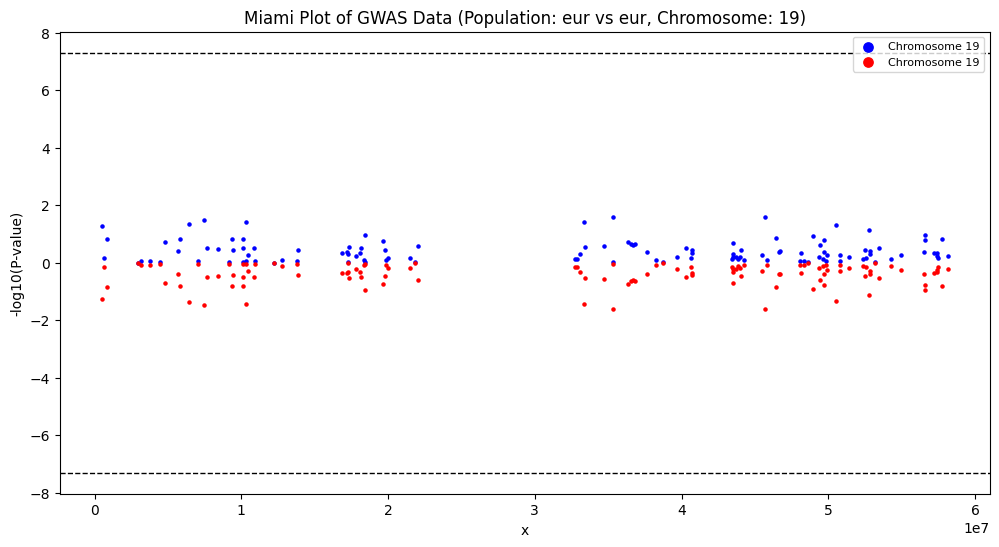

In [100]:
miami(19, 'eur')